### Purpose of the analysis

Understanding customer behavior is very crucial while running every business. It can help to define a target group, to reach the audience, and get better results than sending offers to random people. We can adjust marketing campaigns to our customers, to their needs and expectations. The main purpose of this analysis is to define customers groups (segments) through different clustering methods. 

In [177]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/rppradhan08/rfm-segmentation/blob/master/images/Customer-segmentation.png?raw=true", 
     width=800, height=1000)

In [178]:
print("Image source: https://github.com/rppradhan08/rfm-segmentation")

Image source: https://github.com/rppradhan08/rfm-segmentation


#### Installing libraries & downloading dataset

In [230]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import warnings
from matplotlib import colors
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import math

In [180]:
cmap = colors.ListedColormap(["#F5B19C", "#EDCABE", "#E9B666", "#BFD0CA", "#A5B2B5", "#0F4C81", "#5C9090"])
pallet = ["#F5B19C", "#EDCABE", "#E9B666", "#BFD0CA", "#A5B2B5", "#0F4C81", "#5C9090"]

In [181]:
print("Data source: https://www.kaggle.com/imakash3011/customer-personality-analysis")

Data source: https://www.kaggle.com/imakash3011/customer-personality-analysis


In [182]:
dataset = pd.read_csv('marketing_campaign.csv', delimiter= '\t')

In [183]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Dataset description

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [185]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### Attributes
	
People:
* 	ID: Customer's unique identifier
* 	Year_Birth: Customer's birth year
*   Age: Customer's age
* 	Education: Customer's education level
* 	Marital_Status: Customer's marital status
* 	Income: Customer's yearly household income
* 	Kidhome: Number of children in customer's household
* 	Teenhome: Number of teenagers in customer's household
* 	Dt_Customer: Date of customer's enrollment with the company
* 	Recency: Number of days since customer's last purchase
* 	Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:
* 	MntWines: Amount spent on wine in last 2 years
* 	MntFruits: Amount spent on fruits in last 2 years
* 	MntMeatProducts: Amount spent on meat in last 2 years
* 	MntFishProducts: Amount spent on fish in last 2 years
* 	MntSweetProducts: Amount spent on sweets in last 2 years
* 	MntGoldProds: Amount spent on gold in last 2 years

Promotion: 
* 	NumDealsPurchases: Number of purchases made with a discount
* 	AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* 	AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* 	AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* 	AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* 	AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* 	Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place:
* 	NumWebPurchases: Number of purchases made through the company’s website
* 	NumCatalogPurchases: Number of purchases made using a catalogue
* 	NumStorePurchases: Number of purchases made directly in stores
* 	NumWebVisitsMonth: Number of visits to company’s website in the last month


#### Adding new features

In [186]:
dataset["Dt_Customer"] = pd.to_datetime(dataset["Dt_Customer"])

In [187]:
#Customer's age
dataset["Age"] = 2022 - dataset["Year_Birth"]
#Days from enrollment 
dataset["DaysWithCompany"] = (datetime.today() - dataset["Dt_Customer"])
dataset["DaysWithCompany"] = dataset["DaysWithCompany"] / np.timedelta64(1,'D')
#Total Spendings
dataset["Spent"] = dataset["MntWines"]+ dataset["MntFruits"]+ dataset["MntMeatProducts"]+ dataset["MntFishProducts"]+ dataset["MntSweetProducts"]+ dataset["MntGoldProds"]
#Marital Status - grouping categories 
dataset["Living_With"]=dataset["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Total Number of children
dataset["Children"]=dataset["Kidhome"] + dataset["Teenhome"]
#Grouping Education Level 
dataset["Education"]=dataset["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [188]:
to_drop = ["Dt_Customer", "Year_Birth", "ID"]
dataset = dataset.drop(to_drop, axis=1)

#### Data exploration

(0.0, 100000.0)

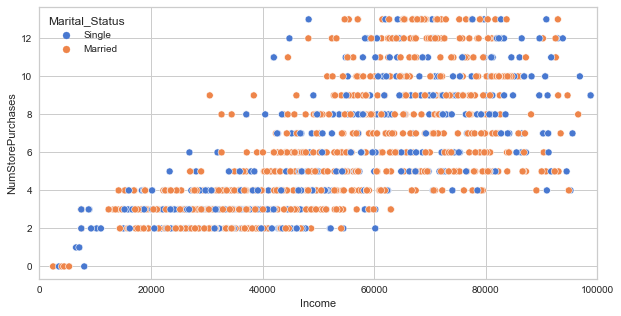

In [189]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', 
                data = dataset[dataset["Marital_Status"].isin(["Single", "Married"])], 
               hue = "Marital_Status", 
               palette="muted")
plt.xlim(0, 100000)

Text(0.5, 1.0, 'Histogram of Marital Status')

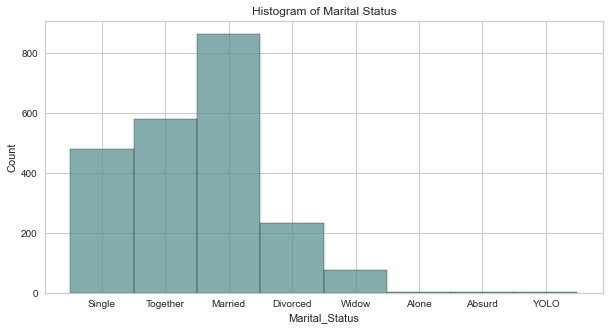

In [190]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, x = "Marital_Status", color = "#5C9090")
plt.title("Histogram of Marital Status")

Text(0.5, 1.0, 'Histogram of Living_With')

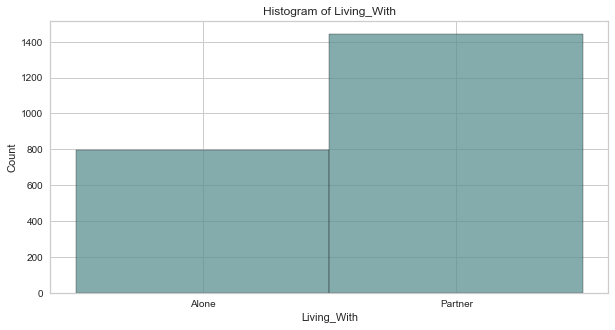

In [191]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, x = "Living_With", color = "#5C9090")
plt.title("Histogram of Living_With")

Text(0.5, 1.0, 'Histogram of Education')

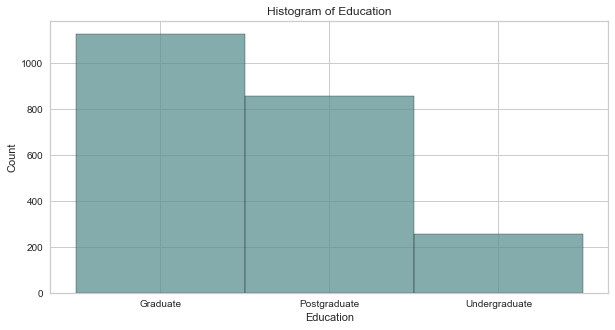

In [192]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, x = "Education", color = "#5C9090")
plt.title("Histogram of Education")

(0.0, 100000.0)

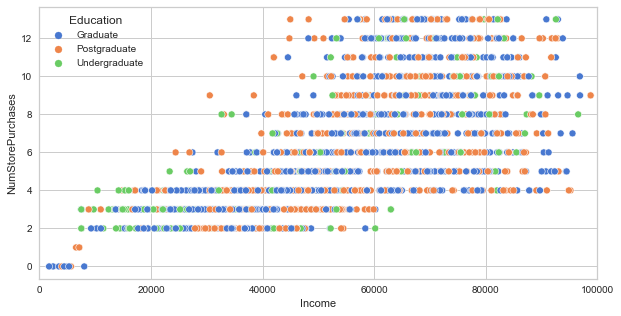

In [193]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', 
                data = dataset, 
               hue = "Education", 
               palette="muted")
plt.xlim(0, 100000)

(0.0, 100000.0)

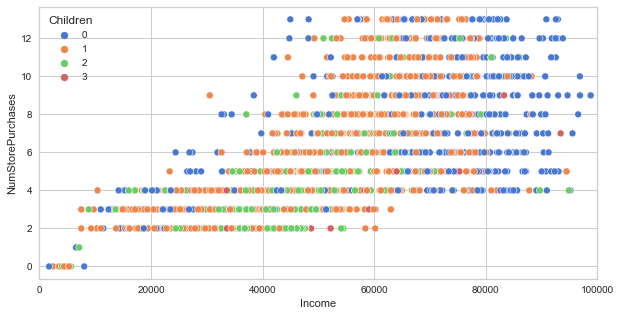

In [194]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', 
                data = dataset, 
               hue = "Children", 
               palette="muted")
plt.xlim(0, 100000)

Text(0.5, 1.0, 'Histogram of Age')

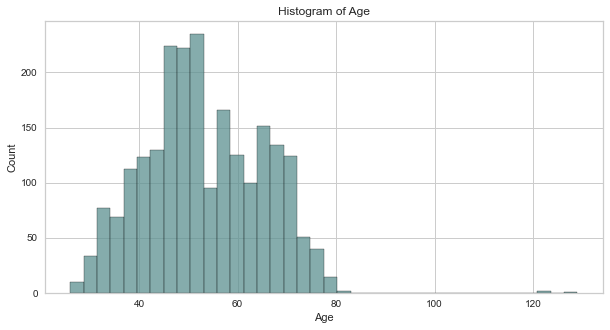

In [195]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, x = "Age", color = "#5C9090")
plt.title("Histogram of Age")

Text(0.5, 1.0, 'Histogram of DaysWithCompany')

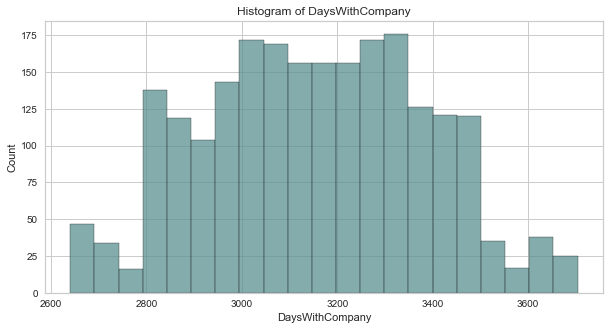

In [196]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, x = "DaysWithCompany", color = "#5C9090")
plt.title("Histogram of DaysWithCompany")

In [197]:
dataset["Children"].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>],
       [<AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
        <AxesSubplot:title={'center':'AcceptedCmp5'}>,

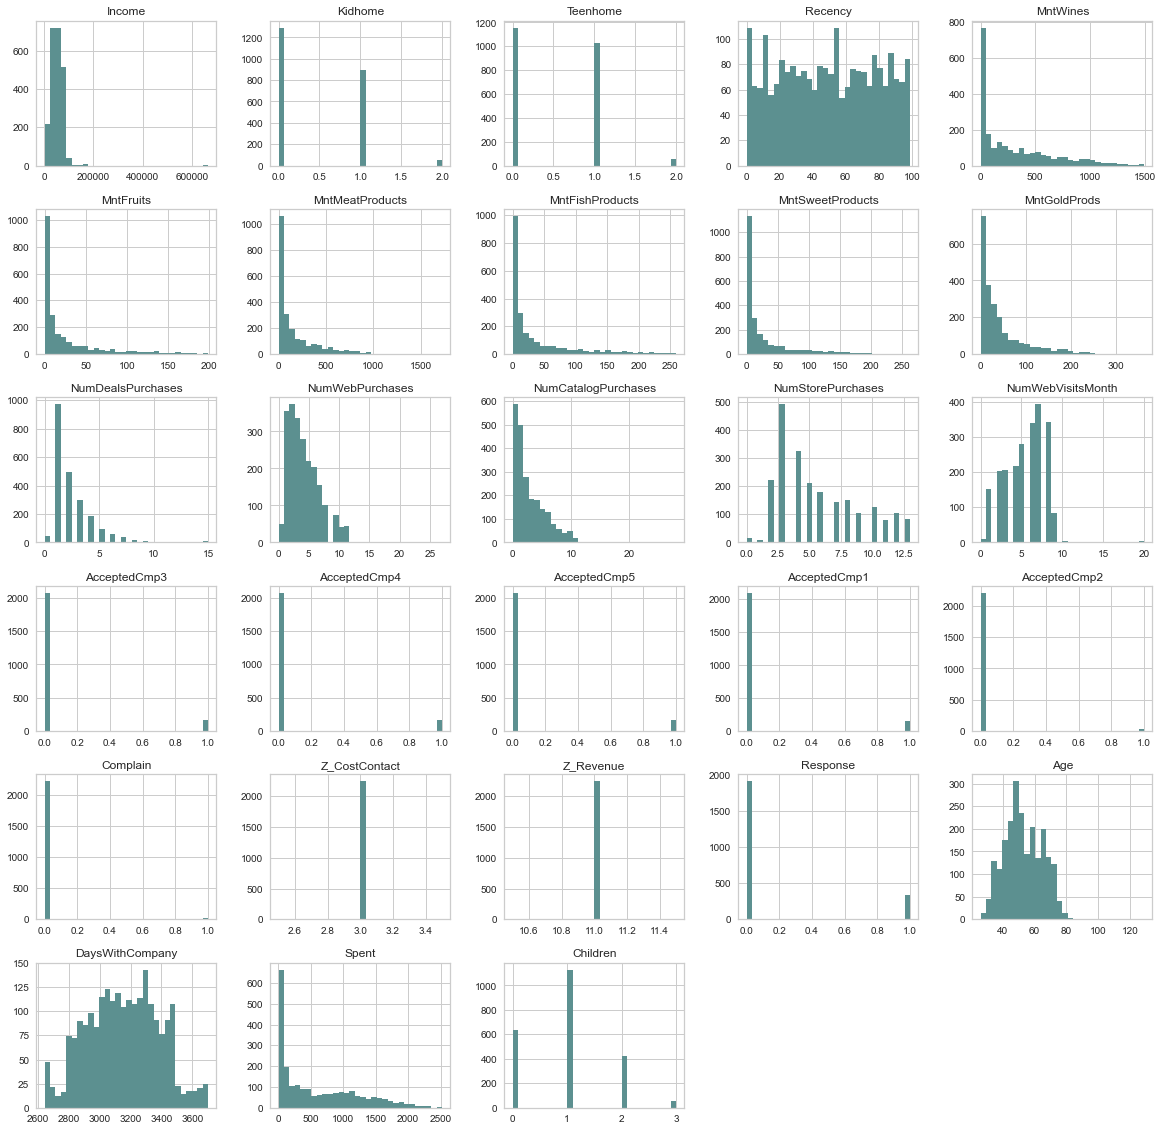

In [198]:
dataset.hist(bins = 30, figsize = (20,20), color = "#5C9090")

#### Detecting & replacing outliers - Three Sigma Rule

As the outliers can affect the results of clustering, some methods to deal with them are needed. One of the methods to deal with outliers is the "Three Sigma Rule". Apart from outliers, a distribution of some numerical variables are skewed (e.g. Age, Income, NumWebPurchases). 

In [199]:
#Detecting outliers with three sigma method 
#Imputing outliers using median value

def median_imputation(df, field_name):
    for i in df[field_name]:
        upper_tail = (df[field_name].mean() + 3 * df[field_name].std())
        lower_tail = (df[field_name].mean() - 3 * df[field_name].std())
        if i > upper_tail or i < lower_tail:
            df[field_name] = df[field_name].replace(i, np.median(df[field_name]))

In [200]:
dataset.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'DaysWithCompany', 'Spent', 'Living_With', 'Children'],
      dtype='object')

In [201]:
median_imputation(dataset, "Income")
median_imputation(dataset, "Recency")
median_imputation(dataset, "MntWines")
median_imputation(dataset, "MntFruits")
median_imputation(dataset, "MntMeatProducts")
median_imputation(dataset, "MntFishProducts")
median_imputation(dataset, "MntSweetProducts")
median_imputation(dataset, "MntGoldProds")
median_imputation(dataset, "NumDealsPurchases")
median_imputation(dataset, "NumWebPurchases")
median_imputation(dataset, "NumCatalogPurchases")
median_imputation(dataset, "NumStorePurchases")
median_imputation(dataset, "NumWebVisitsMonth")
median_imputation(dataset, "Age")
median_imputation(dataset, "DaysWithCompany")
median_imputation(dataset, "Spent")

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysWithCompany'}>,
        <AxesSubplot:title={'center':'Spent'}>]], dtype=object)

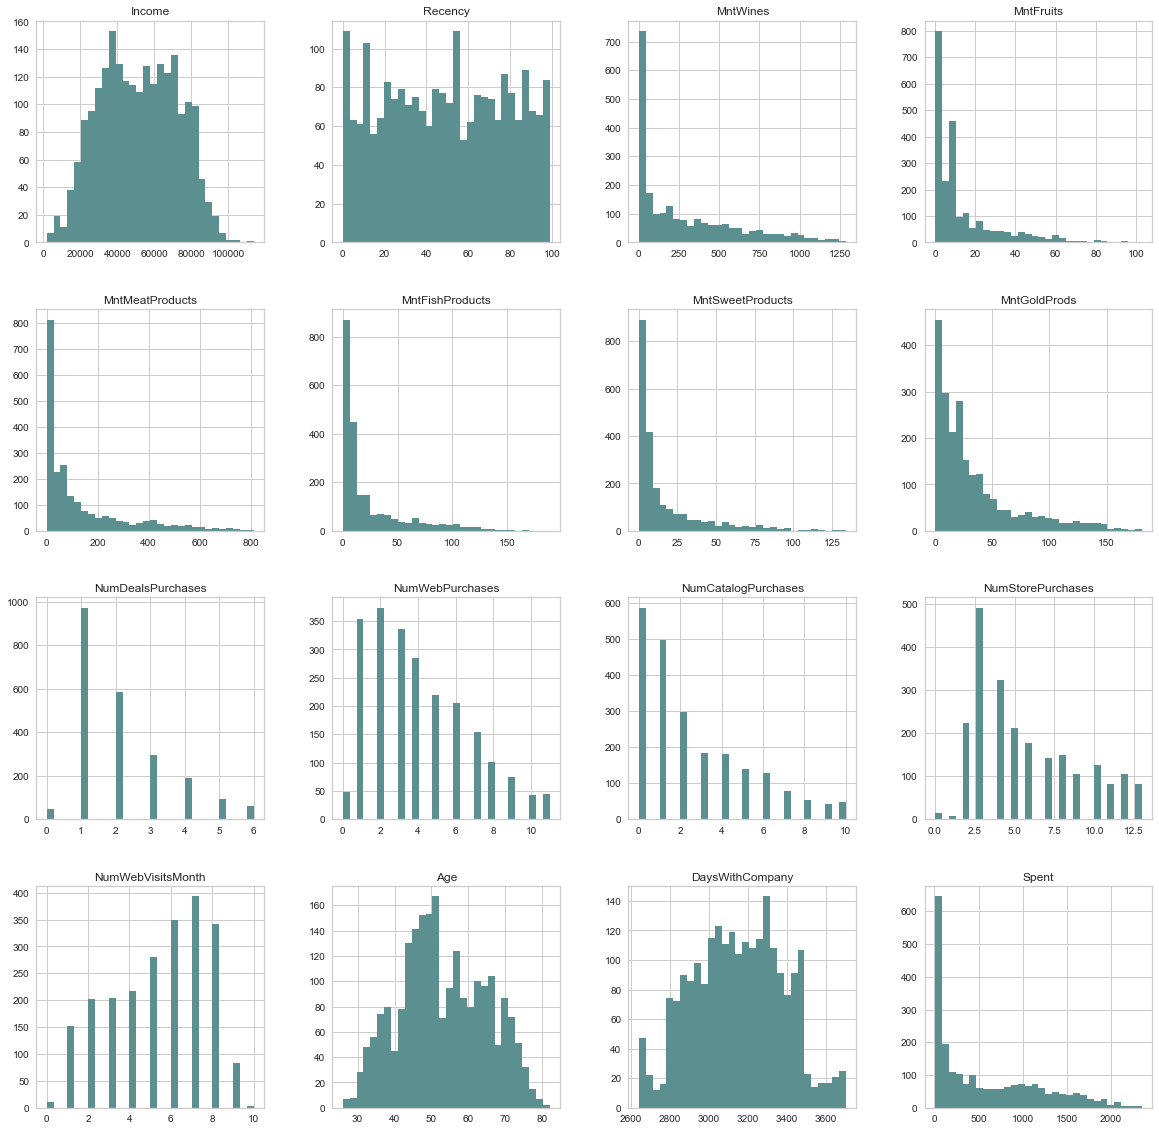

In [202]:
#Histograms after imputation
Plot_Subset = [ "Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", 
          "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", 
          "NumStorePurchases", "NumWebVisitsMonth", "Age", "DaysWithCompany", "Spent"]
dataset[Plot_Subset].hist(bins = 30, figsize = (20,20), color = "#5C9090")

#### Log transformation for skewness 
One of the main assumptions of different ML methods is the symmetric distribution of variables, which means that data are not skewed. Skewness can be removed with logarithmic transformation.

In [203]:
field_names = [
"Income",
"Recency",
"MntWines",
"MntFruits",
"MntMeatProducts",
"MntFishProducts",
"MntSweetProducts",
"MntGoldProds",
"NumDealsPurchases",
"NumWebPurchases",
"NumCatalogPurchases",
"NumStorePurchases",
"NumWebVisitsMonth",
"Age",
"DaysWithCompany",
"Spent"
]
for field_name in field_names:
    dataset[field_name] = np.log(dataset[field_name] + 1)

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>],
       [<AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysWithCompany'}>,
        <AxesSubplot:title={'center':'Spent'}>]], dtype=object)

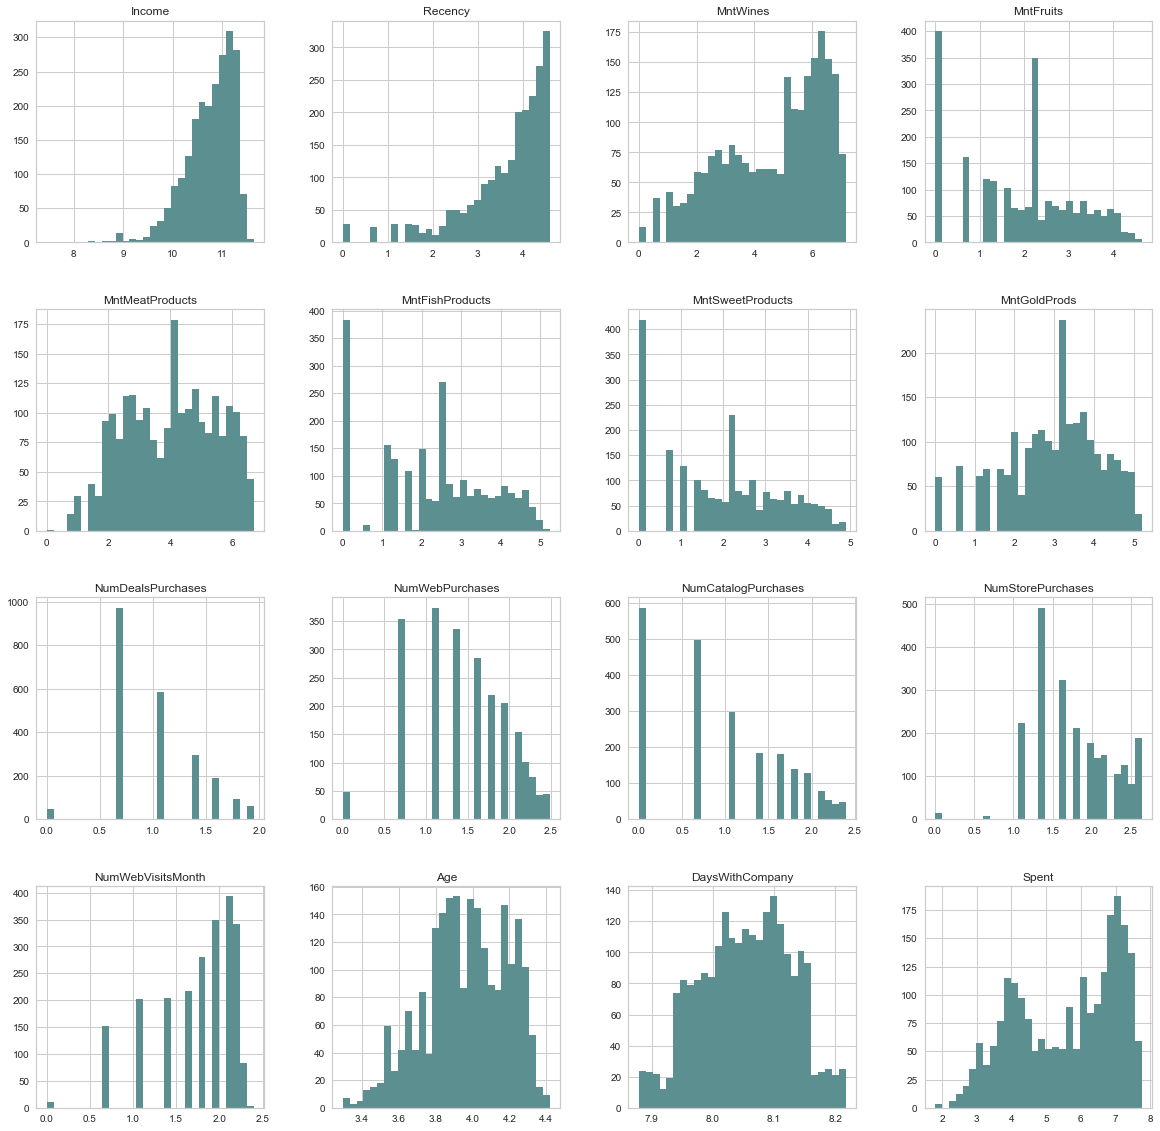

In [204]:
#Histograms after log transformation
dataset[Plot_Subset].hist(bins = 30, figsize = (20,20), color = "#5C9090")

#### Checking null values 

In [205]:
dataset.isnull().sum()

Education               0
Marital_Status          0
Income                 32
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
DaysWithCompany         0
Spent                   0
Living_With             0
Children                0
dtype: int64

A column "Income" has 32 null values. When it comes to information like Income, sometimes people don't want to reveal how much they earn. To fill null values we can use also median imputation. 

In [206]:
dataset["Income"].fillna(dataset["Income"].median(), inplace = True)

In [207]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

#### Correlation matrix

<AxesSubplot:>

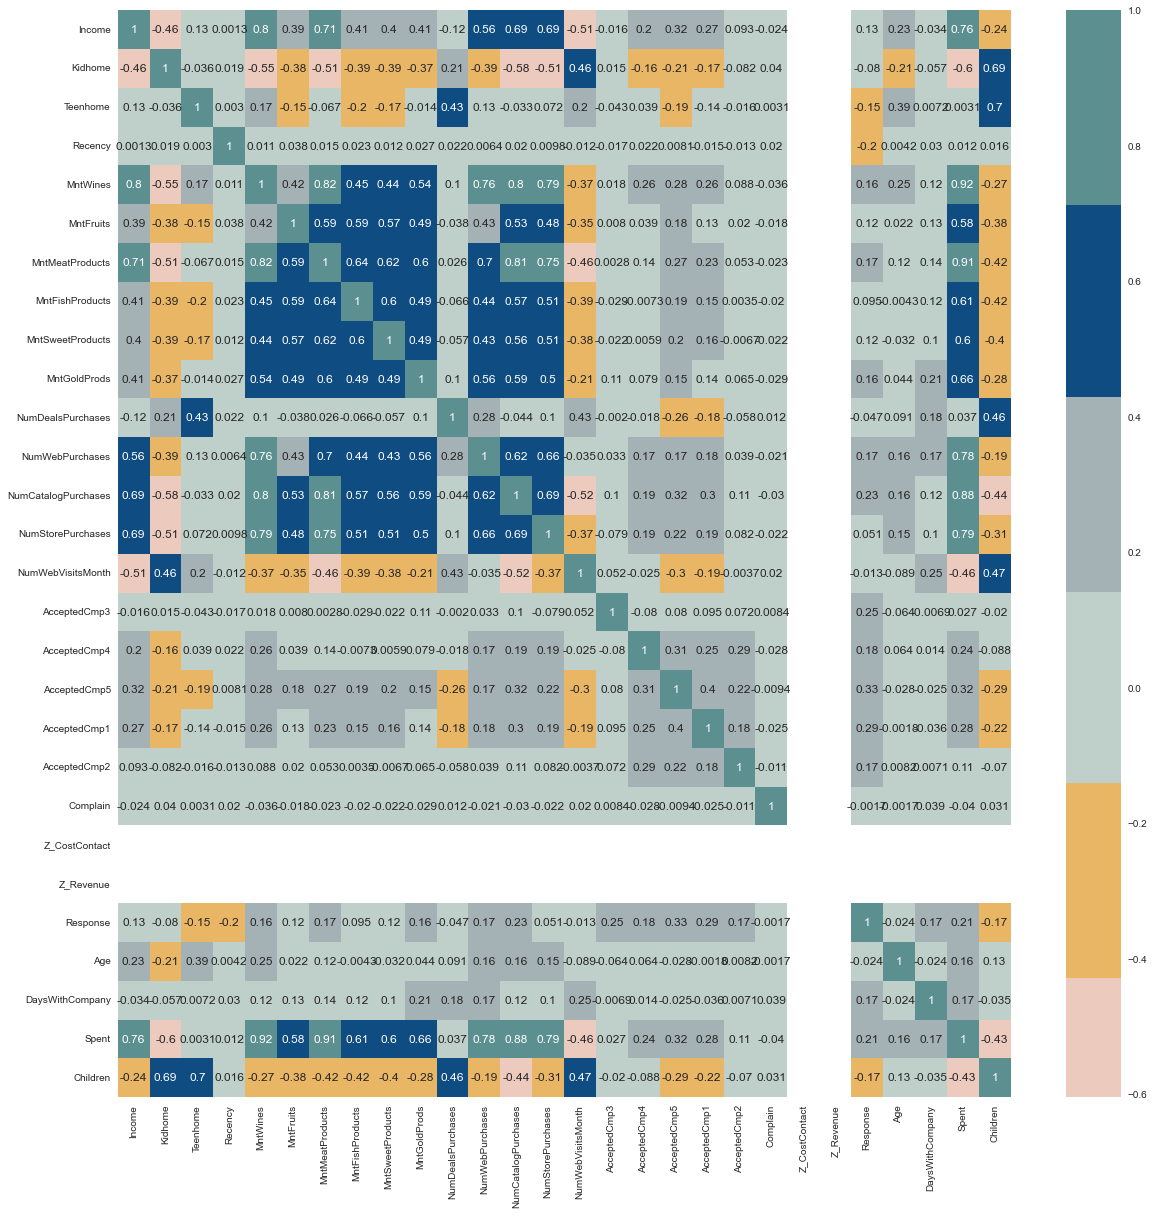

In [208]:
corrmat= dataset.corr()
plt.figure(figsize=(20,20))  

sns.heatmap(corrmat, annot=True, center=0, cmap=cmap)

### Data preprocessing

Before applying clustering methods, there is need to prepare data by encoding categorical variables and scaling features. 

#### Endoding categorical variables

In [209]:
dataset.dtypes == 'object'
categorical_var = ["Education", "Living_With"] #Marital Status is replaced by Living With 

In [210]:
labelencoder = LabelEncoder()

In [211]:
dataset["Education_Cat"] = labelencoder.fit_transform(dataset["Education"])
dataset["Living_With_Cat"] = labelencoder.fit_transform(dataset["Living_With"])

In [213]:
dataset.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Z_CostContact,Z_Revenue,Response,Age,DaysWithCompany,Spent,Living_With,Children,Education_Cat,Living_With_Cat
0,Graduate,Single,10.970592,0,0,4.077537,6.455199,2.197225,6.304449,2.564949,...,3,11,1,4.189655,8.192194,7.388946,Alone,0,0,0
1,Graduate,Single,10.743869,1,1,3.663562,2.484907,0.693147,1.945910,1.098612,...,3,11,0,4.234107,7.925388,3.332205,Alone,2,0,0
2,Graduate,Together,11.179046,0,0,3.295837,6.056784,3.912023,4.852030,4.718499,...,3,11,0,4.060443,8.043547,6.655440,Partner,0,0,1
3,Graduate,Together,10.190432,1,0,3.295837,2.484907,1.609438,3.044522,2.397895,...,3,11,0,3.663562,7.903463,3.988984,Partner,1,0,1
4,Postgraduate,Married,10.973254,1,0,4.553877,5.159055,3.784190,4.779123,3.850148,...,3,11,0,3.737670,7.993836,6.047372,Partner,1,1,1


#### Scaling data

In [215]:
#Making a copy of dataset
data = dataset.copy()
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'DaysWithCompany', 'Spent', 'Living_With', 'Children', 'Education_Cat',
       'Living_With_Cat'],
      dtype='object')

In [216]:
to_drop = ["Education", "Marital_Status", "Living_With"]
data.drop(to_drop, axis = 1, inplace= True)

In [217]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)

In [218]:
scaled_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Z_CostContact,Z_Revenue,Response,Age,DaysWithCompany,Spent,Children,Education_Cat,Living_With_Cat
0,0.445047,-0.825218,-0.929894,0.483779,1.011659,0.204796,1.543195,0.164375,1.768837,1.252108,...,-0.097282,0.0,0.0,2.388846,0.998055,1.873119,1.208661,-1.264505,-0.894974,-1.346874
1,-0.012674,1.032559,0.906934,0.049887,-1.213805,-0.976634,-1.417035,-0.839910,-0.959943,-0.901069,...,-0.097282,0.0,0.0,-0.418612,1.196814,-1.732780,-1.557449,1.396361,-0.894974,-1.346874
2,0.865884,-0.825218,-0.929894,-0.335530,0.788336,1.551743,0.556743,1.639327,0.764032,0.636116,...,-0.097282,0.0,0.0,-0.418612,0.420305,-0.135851,0.708516,-1.264505,-0.894974,0.742460
3,-1.129980,1.032559,-0.929894,-0.335530,-1.213805,-0.256902,-0.670880,0.049961,-0.461603,-1.031604,...,-0.097282,0.0,0.0,-0.418612,-1.354287,-2.029107,-1.109620,0.065928,-0.894974,0.742460
4,0.450422,1.032559,-0.929894,0.983035,0.285133,1.451332,0.507226,1.044599,0.937416,-0.201039,...,-0.097282,0.0,0.0,-0.418612,-1.022925,-0.807710,0.293902,0.065928,0.568341,0.742460


### Clustering 

#### Defining number of clusters

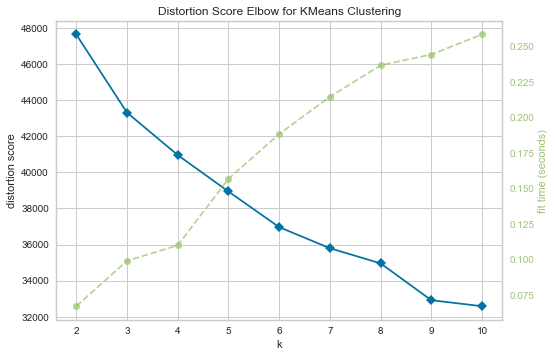

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [219]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

In [220]:
Ag_Clu = AgglomerativeClustering(n_clusters=4)

In [221]:
yhat_Ag_Clu = Ag_Clu.fit_predict(scaled_data)
scaled_data["Clusters"] = yhat_Ag_Clu

In [222]:
dataset["Clusters"]= yhat_Ag_Clu

In [223]:
dataset.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'DaysWithCompany', 'Spent', 'Living_With', 'Children', 'Education_Cat',
       'Living_With_Cat', 'Clusters'],
      dtype='object')

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

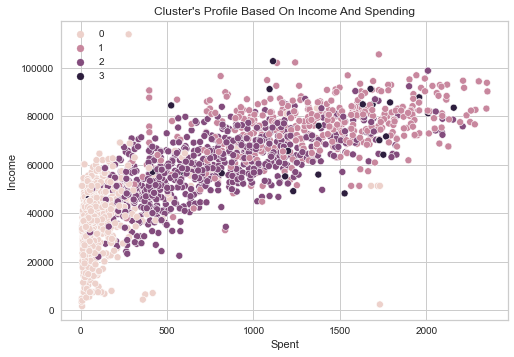

In [235]:
pl = sns.scatterplot(data = dataset,x=np.exp(dataset["Spent"]), y=np.exp(dataset["Income"]),hue=dataset["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.xticks